# <p style="background-color: #f5df18; padding: 10px;"> Foundations of Astronomical Data Science | **Basic Queries** </p>


<div style="display: flex;">
    <div style="flex: 1; margin-right: 20px;">
        <h2>Questions</h2>
        <ul>
            <li>How can we select and download the data we want from the Gaia server?</li>
        </ul>
    </div>
    <div style="flex: 1;">
        <h2>Learning Objectives</h2>
        <ul>
            <li>Compose a basic query in ADQL/SQL.</li>
    <li>Use queries to explore a database and its tables.</li>
    <li>Use queries to download data.</li>
    <li>Develop, test, and debug a query incrementally.</li>
        </ul>
    </div>
</div>

As a running example, we will replicate parts of the analysis in the paper, “[Off the beaten path: Gaia reveals GD-1 stars outside of the main stream](https://arxiv.org/abs/1805.00425)” by Adrian Price-Whelan and Ana Bonaca.

## GD-1 Stellar Stream
---

We use many coordinate systems in astronomy to define the position of celestial objects. One of the most commonly used coordinate systems is the [equatorial coordinate system](https://astronomy.swin.edu.au/cosmos/E/Equatorial+Coordinate+System).




In this system, we define positions using Right Ascension (`R.A.`) and Declination (`Dec.`), which are equivalent to longitude and latitude, respectively.

<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/equatorialcoordinatesystem2.gif" width=500 />



<div>
<img src="https://s3.amazonaws.com/aasie/images/1538-4357/643/1/L17/10_1086_505111_fg1_hr.jpg" width="1500"/>
</div>

**Credit**: [Grillmair & Dionatos 2006](https://ui.adsabs.harvard.edu/abs/2006ApJ...643L..17G/abstract)

## Globular Cluster
---

<div>
<img src="https://cdn.esahubble.org/archives/images/screen/potw1225a.jpg" width="700"/>
</div>

**Credit**: [ESA/Hubble & NASA](https://esahubble.org/images/potw1225a/)

## 🗓 Outline
---

This lesson demonstrates the steps for selecting and downloading data from the Gaia Database:












1. First we will make a connection to the Gaia server,



2. We will explore information about the database and the tables it contains,



3. We will write a query and send it to the server, and finally



4. We will download the response from the server.


## Query Language
---

In order to select data from a database, you need to compose a query,
which is a program written in a "query language".
The query language we will use is ADQL, which stands for "Astronomical
Data Query Language".




ADQL is a dialect of [SQL](https://en.wikipedia.org/wiki/SQL)
(Structured Query Language), which is by far the most commonly used
query language.  Almost everything you will learn about ADQL also
works in SQL.



[The reference manual for ADQL is
here](https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html).
But you might find it easier to learn from [this ADQL
Cookbook](https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook).

# Connecting to <strong><span style="color: indigo;">Gaia</span></strong>

---




<div>
<img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/videos/2019/10/gaia_astronomical_revolution/21106023-7-eng-GB/Gaia_astronomical_revolution_pillars.jpg" width="1300"/>
</div>

------



The library we will use to get Gaia data is
[Astroquery](https://astroquery.readthedocs.io/en/latest/).
Astroquery provides `Gaia`, which is an [object that represents a
connection to the Gaia
database](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html).

We can connect to the Gaia database like this:


This import statement creates a <a href="https://www.ivoa.net/documents/TAP/">TAP+</a> connection; TAP stands for “Table Access Protocol”, which is a network protocol for sending queries to the database and getting back the results.

# Databases and Tables
---


What is a database?  Most generally, it can be any collection
of data, but when we are talking about ADQL or SQL:

- A database is a collection of one or more **named** tables.

- Each table is a 2-D array with one or more **named** columns of data.



<div>
<img src="https://database.guide/wp-content/uploads/2016/06/Relational-Database-Structure-Example-1.png" width="800" />
</div>


We can use `Gaia.load_tables` to get the names of the tables in the
Gaia database.  With the option `only_names=True`, it loads
information about the tables, called "metadata", but not the data itself.

## Let's create a <span style="color: red;">for</span> loop to print the table names

So that is a lot of tables.  The ones we will use are:

- `gaiadr2.gaia_source`, which contains Gaia data from [data release
  2](https://www.cosmos.esa.int/web/gaia/data-release-2),



- `gaiadr2.panstarrs1_original_valid`, which contains the photometry
  data we will use from PanSTARRS, and



- `gaiadr2.panstarrs1_best_neighbour`, which we will use to cross-match
  each star observed by Gaia with the same star observed by PanSTARRS.



We can use `load_table` (not `load_tables`) to get the metadata for a
single table.  The name of this function is misleading, because it
only downloads metadata, not the contents of the table.

### Let's load the metadata for a single table

Jupyter shows that the result is an object of type `TapTableMeta`, but
it does not display the contents.

To see the metadata, we have to print the object.

# Columns
----

### Let's create a <span style="color: red;">for</span> loop to print _**names**_ of the columns in the table.

You can probably infer what many of these columns are by looking at
the names, but you should resist the temptation to guess.
To find out what the columns mean, [read the
documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html).

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>

---

One of the other tables we will use is
`gaiadr2.panstarrs1_original_valid`.  Use `load_table` to get the
metadata for this table.  How many columns are there and what are
their names?

In [1]:
### your answer here ##

# Writing queries

---

You might be wondering how we download these tables. With tables this big, you generally don’t. Instead, you use queries to select only the data you want.

A query is a program written in a query language like SQL. For the Gaia database, the query language is a dialect of SQL called ADQL.

Here’s an example of an ADQL query.

In [ ]:
query1 = """SELECT
TOP 10
source_id, ra, dec, parallax
FROM gaiadr2.gaia_source
"""

## Stellar parallax

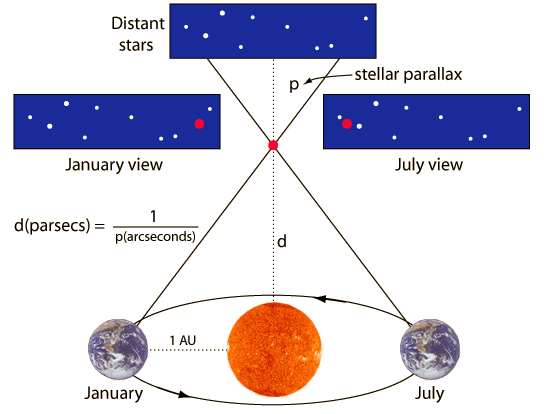



* Note 1: 1 AU is about 93 million miles (150 million kilometers)
* Note 2: 1 parsec is about 3.26 light-years (20 trillion miles)

## 🔔 Triple-quotes strings
---


We use a [triple-quoted string](https://docs.python.org/3/tutorial/introduction.html#strings)
here so we can include line breaks in the query, which makes it easier
to read.

The words in uppercase are ADQL keywords:

- `SELECT` indicates that we are selecting data (as opposed to adding
  or modifying data).

- `TOP` indicates that we only want the first 10 rows of the table,
  which is useful for testing a query before asking for all of the data.



- `FROM` specifies which table we want data from.



The third line is a list of column names, indicating which columns we want.

In this example, the keywords are capitalized and the column names are
lowercase.  This is a common style, but it is not required.  ADQL and
SQL are not case-sensitive.



Also, the query is broken into multiple lines to make it more
readable.  This is a common style, but not required.  Line breaks
don't affect the behavior of the query.



To run this query, we use the `Gaia` object, which represents our
connection to the Gaia database, and invoke `launch_job`:

The result is an object that represents the job running on a Gaia server.

If you <span style="color: red;">print</span> it, it displays metadata for the forthcoming results.

Don't worry about `Results: None`.  That does not actually mean there
are no results.

However, `Phase: COMPLETED` indicates that the job is complete, so we
can get the results like this:

The `type` function indicates that the result is an [Astropy
Table](https://docs.astropy.org/en/stable/table/).

---
## 🔔 **Repetition**

Why is `table` repeated three times?  The first
is the name of the module, the second is the name of the submodule,
and the third is the name of the class.  Most of the time we only care
about the last one. It’s like the [scientific name for the Western lowland gorilla](https://ielc.libguides.com/sdzg/factsheets/westernlowlandgorilla/taxonomy#:~:text=Subfamily%3A%20Homininae,gorilla%20gorilla%20(Western%20lowland%20gorilla), which is Gorilla gorilla gorilla.

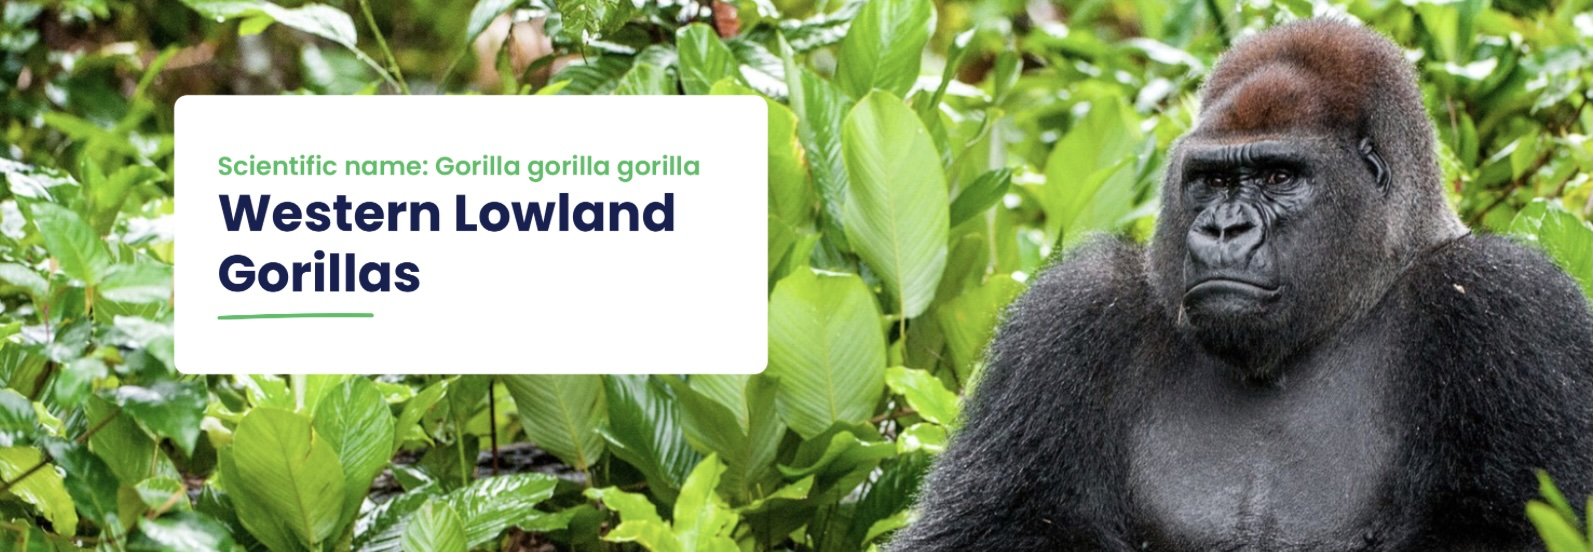
---

An Astropy `Table` is similar to a table in an SQL database except:



- SQL databases are stored on disk drives, so they are persistent;
  that is, they "survive" even if you turn off the computer.  An Astropy
  `Table` is stored in memory; it disappears when you turn off the
  computer (or shut down your Jupyter notebook).



- SQL databases are designed to process queries.  An Astropy `Table`
  can perform some query-like operations, like selecting columns and
  rows.  But these operations use Python syntax, not SQL.



Jupyter knows how to display the contents of a `Table`.

Each column has a name, units, and a data type.

For example, the units of `ra` and `dec` are degrees, and their data
type is `float64`, which is a 64-bit [floating-point
number](https://en.wikipedia.org/wiki/Floating-point_arithmetic), used
to store measurements with a fraction part.

This information comes from the Gaia database, and has been stored in
the Astropy `Table` by Astroquery.

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>
---


Read [the documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html)
of this table and choose a column that looks interesting to you.  Add
the column name to the query and run it again.  What are the units of
the column you selected?  What is its data type?

In [2]:
### your answer here ##

# Asynchronous queries

---

`launch_job` asks the server to run the job "synchronously", which
normally means it runs immediately.  But synchronous jobs are limited
to 2000 rows.  For queries that return more rows, you should run
"asynchronously", which mean they might take longer to get started.



If you are not sure how many rows a query will return, you can use the
SQL command `COUNT` to find out how many rows are in the result
without actually returning them.  We will see an example in the next
lesson.



The results of an asynchronous query are stored in a file on the
server, so you can start a query and come back later to get the
results. For anonymous users, files are kept for three days.


As an example, let us try a query that is similar to `query1`, with these changes:



- It selects the first 3000 rows, so it is bigger than we should run
  synchronously.



- It selects two additional columns, `pmra` and `pmdec`, which are
  proper motions along the axes of `ra` and `dec`.



- It uses a new keyword, `WHERE`.

In [ ]:
query2 = """SELECT
TOP 3000
source_id, ra, dec, parallax, pmra, pmdec
FROM gaiadr2.gaia_source
WHERE parallax < 1"""

A `WHERE` clause indicates which rows we want; in this case, the query
selects only rows "where" `parallax` is less than 1.  This has the
effect of selecting stars with relatively low parallax, which are
farther away.
We'll use this clause to exclude nearby stars that are unlikely to be
part of GD-1.

`WHERE` is one of the most common clauses in ADQL/SQL, and one of the
most useful, because it allows us to download only the rows we need
from the database.

We use `launch_job_async` to submit an asynchronous query.

And here are the results.

You might notice that some values of `parallax` are negative.  As
[this FAQ
explains](https://www.cosmos.esa.int/web/gaia/archive-tips#negative%20parallax),
"Negative parallaxes are caused by errors in the observations."  They
have "no physical meaning," but they can be a "useful diagnostic on
the quality of the astrometric solution."

---
## 🔔 **Different Results**


Your results for this query may differ from the Instructor's. This is because
`TOP 3000` returns 3000 results, but those results are not organized in any
particular way.

---

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>

---
The clauses in a query have to be in the right order.  Go back and
change the order of the clauses in `query2` and run it again.
The modified query should fail, but notice that you don't get much
useful debugging information.

For this reason, developing and debugging ADQL queries can be really
hard.  A few suggestions that might help:

- Whenever possible, start with a working query, either an example you
  find online or a query you have used in the past.

- Make small changes and test each change before you continue.

- While you are debugging, use `TOP` to limit the number of rows in
  the result.  That will make each test run faster, which reduces your
  development time.

- Launching test queries synchronously might make them start faster, too.

In [ ]:
### your solution here ###

# Operators

---

In a `WHERE` clause, you can use any of the [SQL comparison
operators](https://www.w3schools.com/sql/sql_operators.asp); here are
the most common ones:
<br>
| Symbol | Operation             |
| ------ | :-------------------- |
| `>`       | greater than          |
| `<`       | less than             |
| `>=`       | greater than or equal |
| `<=`       | less than or equal    |
| `=`       | equal                 |
| `!=` or `<>`   | not equal             |
<br>


Most of these are the same as Python, but some are not.  In
particular, notice that the equality operator is `=`, not `==`.
Be careful to keep your Python out of your ADQL!



You can combine comparisons using the logical operators:



- AND: true if both comparisons are true


- OR: true if either or both comparisons are true



Finally, you can use `NOT` to invert the result of a comparison.


## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>
---


[Read about SQL operators here](https://www.w3schools.com/sql/sql_operators.asp)
and then modify
the previous query to select rows where `bp_rp` is between `-0.75` and
`2`.



In [3]:
### your answer here ##

`bp_rp` contains BP-RP color, which is the difference between two
other columns, `phot_bp_mean_mag` and `phot_rp_mean_mag`.
You can [read about this variable
here](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html).

<br>
<div>
<img src="https://www.cosmos.esa.int/documents/29201/1645651/GaiaDR2Passbands.png/ba8d3078-0e7a-b316-92d9-cdce748e6484?t=1521129245183" width="900"/>
</div>





**Credits**: [ESA/Gaia/DPAC, P. Montegriffo, F. De Angeli, C. Cacciari](https://www.cosmos.esa.int/web/gaia/iow_20180316)

This [Hertzsprung-Russell
diagram](https://sci.esa.int/web/gaia/-/60198-gaia-hertzsprung-russell-diagram)
shows the BP-RP color and luminosity of stars in the Gaia catalog
(Copyright: ESA/Gaia/DPAC, CC BY-SA 3.0 IGO).


<div>
<img src="https://cdn.sci.esa.int/documents/33580/35361/1567214809100-ESA_Gaia_DR2_HRD_Gaia_625.jpg" width="600"/>
</div>

Selecting stars with `bp-rp` less than 2 excludes many [class M dwarf
stars](https://xkcd.com/2360/), which are low temperature, low
luminosity.  A star like that at GD-1's distance would be hard to
detect, so if it is detected, it is more likely to be in the
foreground.

# Formatting queries

---

The queries we have written so far are string "literals", meaning that
the entire string is part of the program.
But writing queries yourself can be slow, repetitive, and error-prone.



It is often better to write Python code that assembles a query for
you.  One useful tool for that is the [string `format`
method](https://www.w3schools.com/python/ref_string_format.asp).



As an example, we will divide the previous query into two parts; a list
of column names and a "base" for the query that contains everything
except the column names.

Here is the list of columns we will select.

In [ ]:
columns = 'source_id, ra, dec, parallax, pmra, pmdec'

And here is the base. It is a string that contains at least one format
specifier in curly brackets (braces).

In [ ]:
query4_base = """SELECT
TOP 3000
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
AND bp_rp > -0.75 AND bp_rp < 2.0"""

This base query contains one format specifier, `{columns}`, which is a
placeholder for the list of column names we will provide.

To assemble the query, we invoke `format` on the base string and
provide a keyword argument that assigns a value to `columns`.


In this example, the variable that contains the column names and the
variable in the format specifier have the same name.
That is not required, but it is a common style.

The result is a string with line breaks.  If you display it, the line
breaks appear as `\n`.

But if you print it, the line breaks appear as line breaks.

Notice that the format specifier has been replaced with the value of `columns`.

Let's run it and see if it works:

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>
---

This query always selects sources with `parallax` less than 1.  But
suppose you want to take that upper bound as an input.

Modify `query3_base` to replace `1` with a format specifier like
`{max_parallax}`.  Now, when you call `format`, add a keyword argument
that assigns a value to `max_parallax`, and confirm that the format
specifier gets replaced with the value you provide.


In [4]:
### your answer here ##

# Summary

---

This lesson has demonstrated the following steps:


1. Making a connection to the Gaia server,

2. Exploring information about the database and the tables it contains,

3. Writing a query and sending it to the server, and finally

4. Downloading the response from the server as an Astropy `Table`.

In the next lesson we will extend these queries to select a particular region of the sky.

# <p style="background-color: #f5df18; padding: 10px;"> 🗝️ Key points</p>

---
- If you can't download an entire dataset (or it is not practical) use queries to select the data you need.
- Read the metadata and the documentation to make sure you understand the tables, their columns, and what they mean.
- Develop queries incrementally: start with something simple, test it, and add a little bit at a time.
- Use ADQL features like `TOP` and `COUNT` to test before you run a query that might return a lot of data.
- If you know your query will return fewer than 3000 rows, you can run it synchronously.  If it might return more than 3000 rows, you should run it asynchronously.
- ADQL and SQL are not case-sensitive. You don't have to capitalize the keywords, but it will make your code more readable.
- ADQL and SQL don't require you to break a query into multiple lines, but it will make your code more readable.
- Make each section of the notebook self-contained.  Try not to use the same variable name in more than one section.
- Keep notebooks short.  Look for places where you can break your analysis into phases with one notebook per phase.
